In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Leases with lat and long, over 10000 leasedSF ###

In [67]:
leases = pd.read_csv('../Datasets/focused_lease.csv')
leases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29484 entries, 0 to 29483
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            29484 non-null  int64  
 1   quarter                         29484 non-null  object 
 2   monthsigned                     28816 non-null  float64
 3   market                          29484 non-null  object 
 4   building_name                   24163 non-null  object 
 5   building_id                     29484 non-null  object 
 6   address                         29484 non-null  object 
 7   region                          29484 non-null  object 
 8   city                            29484 non-null  object 
 9   state                           29484 non-null  object 
 10  zip                             29484 non-null  float64
 11  internal_submarket              29484 non-null  object 
 12  internal_class                  

In [68]:
duplicates = leases[leases.duplicated()]

print("Duplicate rows:")
print(duplicates)

Duplicate rows:
       year quarter  monthsigned             market building_name  \
5972   2023      Q1          2.0  Southern Maryland       Phase 5   
11614  2022      Q2          4.0          Manhattan        101AOA   
21559  2024      Q3          8.0          Manhattan  51 W 36th St   

                                             building_id  \
5972   Southern Maryland_Rockville_Rockville_Phase 5_...   
11614  Manhattan_Hudson Square_New York_101AOA_101 Av...   
21559  Manhattan_Penn Plaza/Times Square South_New Yo...   

                          address     region       city state  ...  \
5972              7361 Calhoun Pl  Northeast  Rockville    MD  ...   
11614  101 Avenue Of The Americas  Northeast   New York    NY  ...   
21559             43-51 W 36th St  Northeast   New York    NY  ...   

       direct_internal_class_rent direct_overall_rent sublet_available_space  \
5972                          NaN                 NaN                    NaN   
11614                   9

In [69]:
leases = leases.drop_duplicates()

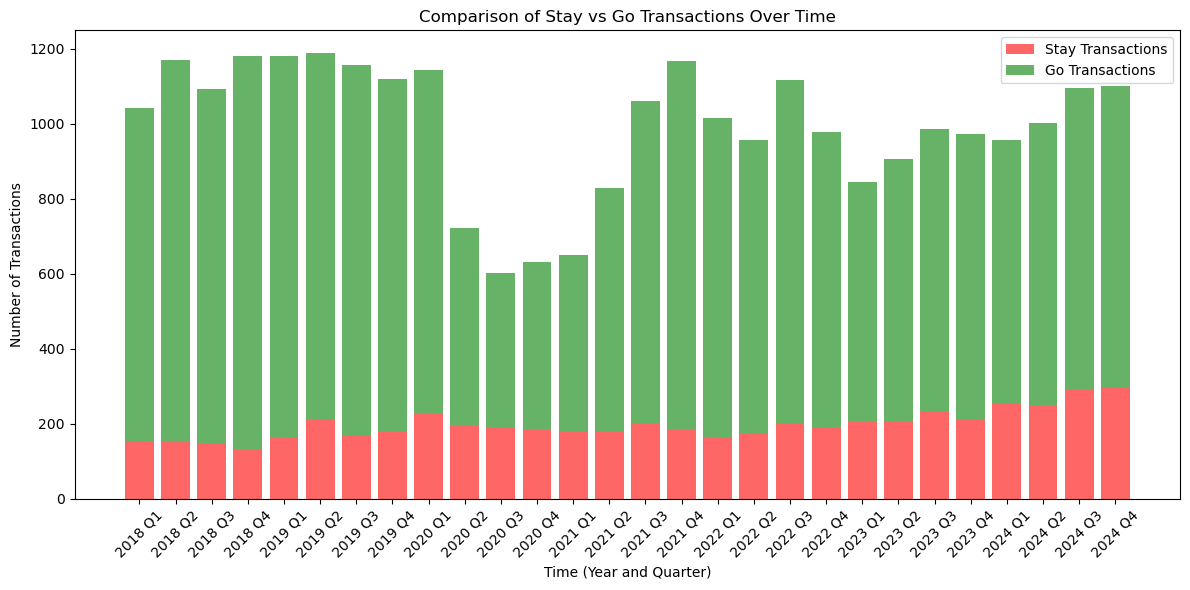

In [70]:
data = leases.copy()

go_categories = ["New", "Relocation"]
stay_categories = ["Renewal", "Expansion", "Restructure", "Extension", "Renewal and Expansion"]

data["transaction_category"] = data["transaction_type"].apply(
    lambda x: "Go" if x in go_categories else ("Stay" if x in stay_categories else "TBD")
)

filtered_data = data[data["transaction_category"].isin(["Stay", "Go"])]

grouped_data = filtered_data.groupby(["year", "quarter", "transaction_category"]).size().reset_index(name="count")

pivot_data = grouped_data.pivot_table(
    index=["year", "quarter"],
    columns="transaction_category",
    values="count",
    fill_value=0
).reset_index()

pivot_data["time"] = pivot_data["year"].astype(str) + " " + pivot_data["quarter"].astype(str)

plt.figure(figsize=(12, 6))
plt.bar(pivot_data["time"], pivot_data["Stay"], color="red", alpha=0.6, label="Stay Transactions")
plt.bar(pivot_data["time"], pivot_data["Go"], color="green", alpha=0.6, label="Go Transactions", bottom=pivot_data["Stay"])

plt.title("Comparison of Stay vs Go Transactions Over Time")
plt.xlabel("Time (Year and Quarter)")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Quarterly Percentage Changes:
time_period  Stay_pct_change  Go_pct_change
    2018 Q1              NaN            NaN
    2018 Q2         0.662252      14.365881
    2018 Q3        -2.631579      -7.360157
    2018 Q4       -10.810811      11.228814
    2019 Q1        25.000000      -3.142857
    2019 Q2        26.666667      -3.539823
    2019 Q3       -18.660287       0.713558
    2019 Q4         6.470588      -5.060729
    2020 Q1        25.966851      -2.452026
    2020 Q2       -14.912281     -42.404372
    2020 Q3        -2.061856     -21.821632
    2020 Q4        -1.578947       8.009709
    2021 Q1        -4.812834       6.067416
    2021 Q2         0.000000      37.923729
    2021 Q3        12.921348      32.104455
    2021 Q4        -7.960199      14.186047
    2022 Q1       -12.432432     -13.034623
    2022 Q2         6.172840      -8.196721
    2022 Q3        15.116279      17.346939
    2022 Q4        -3.030303     -14.456522
    2023 Q1         8.333333     -19.059720
  

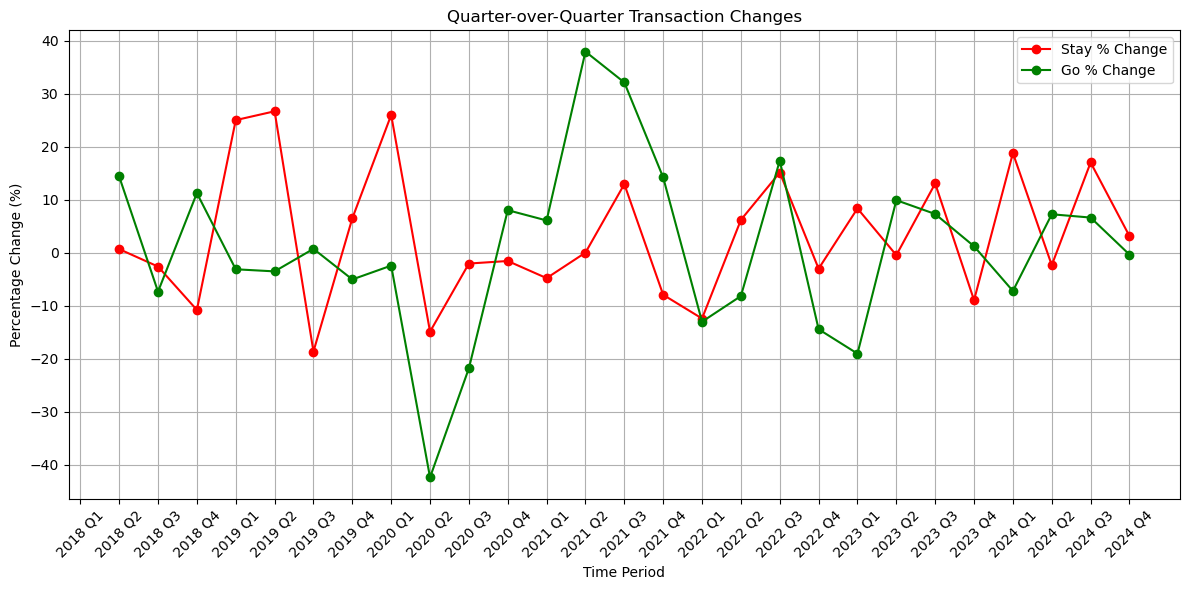

In [ ]:
data = leases.copy()

go_categories = ["New", "Relocation"]
stay_categories = ["Renewal", "Expansion", "Restructure", "Extension", "Renewal and Expansion"]

data["transaction_category"] = data["transaction_type"].apply(
    lambda x: "Go" if x in go_categories else ("Stay" if x in stay_categories else "TBD")
)

filtered_data = data[data["transaction_category"].isin(["Stay", "Go"])]
grouped = filtered_data.groupby(["year", "quarter", "transaction_category"]).size().unstack(fill_value=0)

grouped["Stay_pct_change"] = grouped["Stay"].pct_change() * 100
grouped["Go_pct_change"] = grouped["Go"].pct_change() * 100

grouped["time_period"] = grouped.index.get_level_values("year").astype(str) + " " + grouped.index.get_level_values("quarter").astype(str)
result = grouped[["time_period", "Stay_pct_change", "Go_pct_change"]].reset_index(drop=True)

print("Quarterly Percentage Changes:")
print(result.to_string(index=False))

plt.figure(figsize=(12, 6))
plt.plot(result["time_period"], result["Stay_pct_change"], marker="o", label="Stay % Change", color="red")
plt.plot(result["time_period"], result["Go_pct_change"], marker="o", label="Go % Change", color="green")
plt.title("Quarter-over-Quarter Transaction Changes")
plt.xlabel("Time Period")
plt.ylabel("Percentage Change (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
